# 第一章 Tensorflow安装
**笔记产出**
1. hdf5版本不一致问题
2. anaconda+pycharm+jupyter notebook+tensorflow
- https://blog.csdn.net/weixin_45337440/article/details/107621494
3. 里面安装失败的说明

In [1]:
import tensorflow as tf

In [7]:
tf.compat.v1.disable_eager_execution() #保证sess.run()能够正常运行
hello = tf.constant('hello,tensorflow')
sess= tf.compat.v1.Session() #版本2.0的函数
print(sess.run(hello))

b'hello,tensorflow'


In [8]:
sess.close()

# 第二章 Tensorflow基本构架

## 2.1 处理结构

因为TensorFlow是采用数据流图（data　flow　graphs）来计算, 所以首先我们得创建一个数据流流图, 然后再将我们的数据（数据以张量(tensor)的形式存在）放在数据流图中计算. 节点（Nodes）在图中表示数学操作,图中的线（edges）则表示在节点间相互联系的多维数据数组, 即张量（tensor). 

**Tensor 张量意义**

张量有多种. 零阶张量为 纯量或标量 (scalar) 也就是一个数值. 比如 [1] * 一阶张量为 向量 (vector), 比如 一维的 [1, 2, 3] * 二阶张量为 矩阵 (matrix), 比如 二维的 [[1, 2, 3],[4, 5, 6],[7, 8, 9]] * 以此类推, 还有 三阶 三维的 ...

## 2.2 例子

### 1. 创建数据

In [10]:
import numpy as np

In [11]:
# create data
# 输入x_data,实际值y_data
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

- 目标：用 tf.Variable 来创建描述 y 的参数Weights和biases.

把 y_data = x_data*0.1 + 0.3 想象成 y=Weights * x + biases, 然后神经网络也就是学着把 Weights 变成 0.1, biases 变成 0.3.

### 2. 搭建模型

In [20]:
#参数初始化
Weights = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
biases = tf.Variable(tf.random.uniform([1]))

y = Weights * x_data + biases

### 3. 计算误差

In [21]:
loss = tf.reduce_mean(tf.square(y-y_data)) #计算误差

### 4. 传播误差

反向传递误差的工作就教给optimizer了, 我们使用的误差传递方法是梯度下降法: Gradient Descent 让后我们使用 optimizer 来进行参数的更新.

In [27]:
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

### 5. 训练

**必须先初始化所有之前定义的Variable**

In [30]:
# init = tf.compat.v1.initialize_all_variables()

In [31]:
init = tf.compat.v1.global_variables_initializer()

- 用 Session 来执行 init 初始化步骤. 
- 用 Session 来 run 每一次 training 的数据. 逐步提升神经网络的预测准确性.

In [32]:
sess = tf.compat.v1.Session()
sess.run(init)

In [33]:
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(Weights), sess.run(biases))

0 [0.3934375] [-0.1279012]
20 [0.21050449] [0.24137582]
40 [0.13006663] [0.28404924]
60 [0.10818068] [0.29566005]
80 [0.10222585] [0.29881915]
100 [0.10060564] [0.2996787]
120 [0.10016477] [0.2999126]
140 [0.10004483] [0.29997623]
160 [0.10001221] [0.29999354]
180 [0.10000332] [0.29999825]
200 [0.1000009] [0.29999954]


## 2.3 Session会话控制

In [34]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # 版本2.0兼容1.0

Instructions for updating:
non-resource variables are not supported in the long term


### 2.3.1 Session介绍

- Session（会话）：tensorflow把前台(即python程序)与后台程序之间的连接称为"会话(Session)"
- run()方法：Session对象创建完毕，便可以使用它最重要的方法run()来启动所需要的数据流图进行计算。
run(fetches, feed_dict=None, options=None, run_metadata=None)
    - 1. fetches参数：表示数据流图中能接收的任意数据流图元素，各类Op/Tensor对象
    - 2.feed_dict参数：给数据流图提供运行时数据。feed_dict的数据结构为字典，其元素为各种键值对。
- session结束两种模式：
    - sess.run()+sess.close()
    - with tf.Session() as sess:
        sess.run()#执行完自动结束

In [35]:
matrix1 = tf.constant([[3,3]])#1行两列矩阵
matrix2 = tf.constant([[2],
                      [2]])#两行1列矩阵

product = tf.matmul(matrix1, matrix2) #矩阵相乘
sess = tf.Session()

#method 1
result = sess.run(product)
print(result)
sess.close()

[[12]]


In [36]:
# method 2
with tf.Session() as sess:
    result2 = sess.run(product)
    print(result2)

[[12]]


## 2.4 Variable 变量

1. 语法定义：state = tf.Variable()
2. 初始化变量：init = tf.initialize_all_variables()
3. 激活变量：sess.run(init)
- 例子：

In [37]:
state = tf.Variable(0, name='counter')

# 定义常量one 
one = tf.constant(1)
# 定义加法（注：此部分尚未直接计算）op：tensor(数据)+operation（操作）
new_value = tf.add(state, one)
# 创建一个 op, 其作用是使 state 增加 1 
# 将State更新成new_value
update = tf.assign(state, new_value)


In [41]:
# 启动图后, 变量必须先经过`初始化` (init) op 初始化,
# 首先必须增加一个`初始化` op 到图中.
# 初始化变量
# init = tf.initialize_all_variables()
# 替换成这样就好
init = tf.global_variables_initializer()
# 使用Session激活变量
# 启动图, 运行 op
with tf.Session() as sess:
    # 运行 'init' op
    sess.run(init)
    for _ in range(3):
        # 运行 op, 更新 'state', 并打印 'state'
        sess.run(update)
        #一定要把 sess 的指针指向 state 再进行 print 才能得到想要的结果！
        print(sess.run(state))
        print(state)#不起作用，一直是初始值0，无数据流图的变化      

1
<tf.Variable 'counter:0' shape=() dtype=int32_ref>
2
<tf.Variable 'counter:0' shape=() dtype=int32_ref>
3
<tf.Variable 'counter:0' shape=() dtype=int32_ref>


## 2.5 Placeholder传入值

- placeholder 是 Tensorflow 中的占位符，暂时储存变量.
- Tensorflow 如果想要从外部传入data, 那就需要用到 tf.placeholder(), 然后以这种形式传输数据 sess.run(***, feed_dict={input: **}).

In [42]:
#在 Tensorflow 中需要定义 placeholder 的 type ，一般为 float32 形式
input1 = tf.placeholder(dtype=tf.float32)
input2 = tf.placeholder(tf.float32)

# mul = multipy 将input1和input2相乘
output = tf.multiply(input1, input2)

传值的工作交给了 sess.run() , 需要传入的值放在了feed_dict={} 并一一对应每一个 input. placeholder 与 feed_dict={} 是绑定在一起出现的。

In [43]:
with tf.Session() as sess:
    result = sess.run(output, feed_dict={input1:[7.], input2:[2.]})
    print(result)

[14.]


## 2.6 激励函数

我们可以把整个网络简化成这样一个式子. `Y = Wx`, W 就是我们要求的参数, y 是预测值, x 是输入值. 用这个式子, 我们很容易就能描述`线性问题`

对于非线性问题，`AF 就是指的激励函数`，它其实就是另外一个`非线性函数`. 比如说`relu, sigmoid, tanh`. 将这些掰弯利器嵌套在原有的结果之上, 强行把原有的线性结果给扭曲了. 使得输出结果 y 也有了非线性的特征. 

甚至可以创造自己的激励函数来处理自己的问题, 不过要确保的是这些`激励函数必须是可以微分的`, 因为在 backpropagation 误差反向传递的时候, 只有这些可微分的激励函数才能把误差传递回去.

`激励函数运行时激活神经网络中某一部分神经元，将激活信息向后传入下一层的神经系统。激励函数的实质是非线性方程。` Tensorflow 的神经网络 里面处理较为复杂的问题时都会需要运用激励函数 activation function
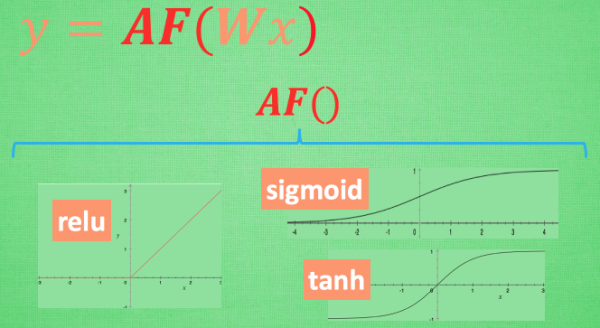

- ML激活函数使用法则：https://www.cnblogs.com/tanrong/p/9932087.html
- 想要恰当使用这些激励函数, 还是有窍门的. 比如`当你的神经网络层只有两三层, 不是很多的时候, 对于隐藏层, 使用任意的激励函数, 随便掰弯是可以的, 不会有特别大的影响`. 不过, 当你使用特别多层的神经网络, 在掰弯的时候, 玩玩不得随意选择利器. 因为这会涉及到梯度爆炸, 梯度消失的问题.

首选的激励函数：在少量层结构中, 我们可以尝试很多种不同的激励函数. 在卷积神经网络 Convolutional neural networks 的卷积层中, 推荐的激励函数是 relu. 在循环神经网络中 recurrent neural networks, 推荐的是 tanh 或者是 relu 